In [85]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/fig3a/'

Populating the interactive namespace from numpy and matplotlib


In [86]:
# Plot s value distributions for different periods

def main():
    prior = '3'
    epsilon = '0.005'
    inFile = '/storage/BonnieH/selection_project/per_locus/results/%s_3_0.3_yny5_eurodem_pr%s_all_per.txt'%(epsilon, prior)
    
    results_file = open(inFile, 'r')
    svals_dic = {}
    svals_dic_normalized = {}
    periods = [2,3,4]
    for per in periods:
        svals_dic[per] = [0,0,0,0]
        svals_dic_normalized[per] = [0,0,0,0]
    header = results_file.readline().strip()
    
    for line in results_file:
            
        # Get information from line
        info = line.strip().split('\t')
        chrom = info[0]
        start = int(info[1])
        end = int(info[2])
        per = int(info[3])
        optimal_ru = int(info[4])
        ABC_s = info[16]

        if ABC_s != 'N/A': 
            if per == 2 or per ==4 or (per ==3 and optimal_ru >=9):
                ABC_s = float(info[16])

                if ABC_s < 10**-4:
                    svals_dic[per][0] += 1
                elif ABC_s < 10**-3:
                    svals_dic[per][1] += 1
                elif ABC_s < 10**-2:
                    svals_dic[per][2] += 1
                elif ABC_s >= 10**-2:
                    svals_dic[per][3] += 1
    
    results_file.close()
    
    plt.figure(figsize=(10,6))
    for per in periods:
        sum_of_list = sum(svals_dic[per])
        for i in range(0, len(svals_dic[per])):
            svals_dic_normalized[per][i] = svals_dic[per][i]/sum_of_list
    
    x = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
    y_pos = np.arange(len(x))
    
    barWidth = 0.2
    r1 = np.arange(len(x))
    r2 = [y + barWidth for y in r1]
    r3 = [y-barWidth for y in r1]
   
    # Make the plot
    plt.bar(r3, svals_dic_normalized[2], color='red', width=barWidth, edgecolor='white', label='dinucleotides') 
    plt.bar(r1, svals_dic_normalized[3], color='gold', width=barWidth, edgecolor='white', label='trinucleotides') 
    plt.bar(r2, svals_dic_normalized[4], color='blue', width=barWidth, edgecolor='white', label='tetranucleotides') 
   
    plt.xticks([r + barWidth/2 for r in range(len(x))], x)
    
    plt.xlabel("S value", size=20)
    plt.ylabel("Fraction of loci", size=20)
    plt.xticks(fontsize=15, rotation=15) # rotation=90
    plt.yticks(fontsize=15)
    plt.title("Distribution of posterior estimates of selection coefficients \n Prior %s"%(prior), size=20) #: : \n ABC acceptance < 40%Trinucleotides Optimal Ru >= 9
    plt.legend() 
    plt.savefig("/storage/BonnieH/selection_project/figures/figures/fig3a/fig3a_prior_%s.pdf"%(prior),bbox_inches='tight')

CPU times: user 620 ms, sys: 22 ms, total: 642 ms
Wall time: 639 ms


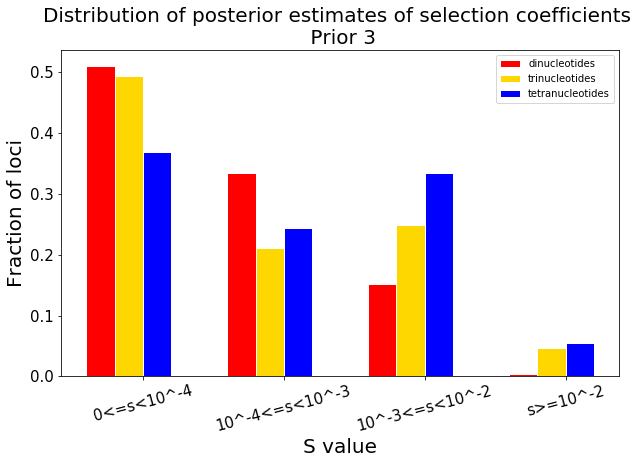

In [87]:
%%time
if __name__ == '__main__':
    main()